# Assignment 2 - Swarm Intelligence

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Seed

In [2]:
np.random.seed(0)

## Exercise 2 - PSO

In [3]:
# Function to minimize
def f(x):
    return x**2

In [4]:
def pso(x, v, w, a1, a2, r1, r2):
    x_hat = 0 
    g_hat = 0

    x_all = [x]

    i = 0
    while(i < 100):
        v = w*v + a1*r1*(x_hat - x) + a2*r2*(g_hat - x)
        x = x+v

        if i == 0:
            x_hat = x
            g_hat = x
        else:
            x_hat = x if f(x) < f(x_hat) else x_hat
            g_hat = x if f(x) < f(g_hat) else g_hat

        i += 1
        x_all.append(x)
    
    return x_all

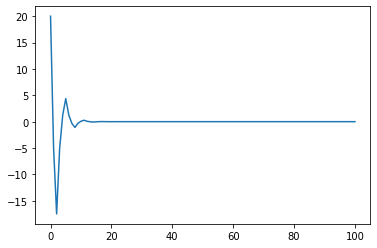

In [5]:
plt.plot(pso(20, 10, 0.5, 1.5, 1.5, 0.5, 0.5))
plt.show()

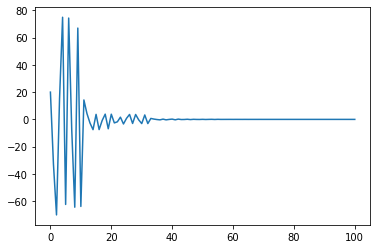

In [6]:
plt.plot(pso(20, 10, 0.7, 1.5, 1.5, 1.0, 1.0))
plt.show()

## Exercise 3 - PSO

#### Helper Functions

In [7]:
def distance(z, m):
    return np.sqrt(np.sum((z - m)**2))

In [8]:
def fitness(D, C, Nc):
    score = 0
    
    for i in range(Nc):
        indices = np.where(C == i)[0]
        score += (np.sum(D[indices, i]) / np.max([len(indices), 1]))
        
    return score / Nc

In [9]:
def update(particle, velocity, gbest, lbest, w, a1, a2):
    r1, r2 = np.random.uniform(0, 1, (2, *velocity.shape))
    velocity = (w*velocity) + (a1*r1*(particle - lbest)) + (a2*r2*(particle - gbest))
    
    return velocity

#### Parameters

In [10]:
Nc = 2
Nd = 2
No = 400
Np = 10
iterations = 100

w = 0.72
a1 = 1.49
a2 = 1.49

#### Create Dataset

In [11]:
data = np.random.uniform(-1, 1, (No, Nd))

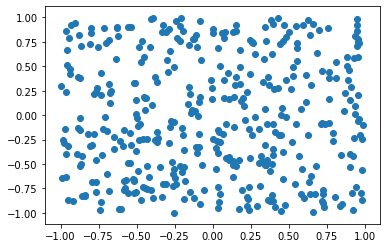

In [12]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

#### Create Particles

In [13]:
particles = np.random.uniform(-1, 1, (Np, Nc, Nd))
print(particles.shape)

(10, 2, 2)


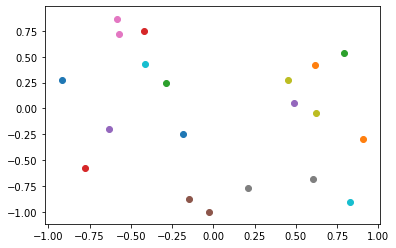

In [14]:
for particle in particles:
    plt.scatter(particle[:,0], particle[:, 1])

#### PSO Algorithm

In [15]:
velocities = np.zeros((Np, Nc, Nd))

gbest_f = 0 
gbest_x = np.zeros((Nc, Nd))

lbest_f = np.zeros(Np)
lbest_x = np.zeros((Np, Nc, Nd))

for i in range(iterations):
    
    # Loop over all particles
    for j in range(Np):
        clusters = np.zeros(No)
        distances = np.zeros((No, Nc))
        
        # Loop oveer all data points
        for k in range(No):
            # Compute distances to all clusters
            distances[k] = [distance(data[k], m) for m in particles[j]]

            # Assign closest cluster
            clusters[k] = np.argmin(distances[k])
        
        # Compute fitness scores
        f = fitness(distances, clusters, Nc)
        
        # Update local best
        if(i == 0):
            lbest_f[j] = f
            lbest_x[j] = particles[j]
        else:
            if(f < lbest_f[j]):
                lbest_f[j] = f
                lbest_x[j] = particles[j]
        
    # Update local best
    if(i == 0):
        gbest_f = np.min(lbest_f)
        gbest_x = particles[np.argmin(lbest_f)]
    else:
        if(np.min(lbest_f) < gbest_f):
            gbest_f = np.min(lbest_f)
            gbest_x = particles[np.argmin(lbest_f)]
        
    # Update velocities 
    for j in range(Np):
        velocities[j] = update(particles[j], velocities[j], gbest_x, lbest_x[j], w, a1, a2)
    
    # Update particles
    particles += velocities

In [16]:
print(particles)

[[[-8.37020147e+44 -1.55820958e+45]
  [-2.00235163e+44 -1.90152287e+45]]

 [[-7.24764369e+44  4.67139092e+42]
  [ 1.59654668e+46 -1.88506814e+44]]

 [[ 2.73514074e+31  9.89544667e+28]
  [-4.04823634e+29  8.20301513e+29]]

 [[-9.59305022e+46  6.11588238e+47]
  [-1.13345509e+45 -1.84998891e+44]]

 [[-1.38745979e+47 -5.30317101e+45]
  [ 1.75176052e+44 -2.76989978e+44]]

 [[-2.21266352e+44 -3.66469349e+44]
  [-2.49064758e+45 -6.67130056e+46]]

 [[-1.06122075e+46  5.81776529e+44]
  [-4.22082579e+44  1.06665539e+43]]

 [[-4.33054305e+44 -2.64805058e+45]
  [ 4.28790729e+46 -7.82121577e+45]]

 [[-3.36578482e+46 -8.17074745e+46]
  [ 3.36603493e+45 -1.03841416e+44]]

 [[-2.25986664e+43 -1.59883294e+46]
  [-6.47312632e+44  1.29537297e+46]]]


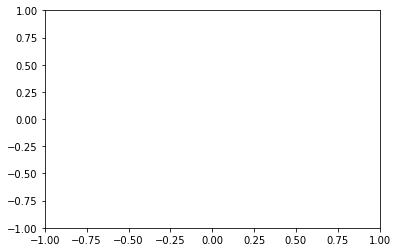

In [17]:
for particle in particles:
    plt.scatter(particle[:,0], particle[:, 1])
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)